In [2]:
import tifffile
from pyotf.phaseretrieval import retrieve_phase
from pyotf.utils import prep_data_for_PR
from skimage.transform import rescale
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_uint
from pyotf.utils import prep_data_for_PR, center_data
from pyotf.otf import HanserPSF, apply_aberration, apply_named_aberration, apply_named_aberrations
from skimage.filters import gaussian

In [34]:
a = tifffile.imread("NA157_Exp_PSF.tif")

In [53]:
help(HanserPSF)

Help on class HanserPSF in module pyotf.otf:

class HanserPSF(BasePSF)
 |  HanserPSF(*args, zrange=None, **kwargs)
 |  
 |  A class defining the pupil function and its closely related methods.
 |  
 |  Based on the following work
 |  
 |  [(1) Hanser, B. M.; Gustafsson, M. G. L.; Agard, D. A.; Sedat, J. W.
 |  Phase-Retrieved Pupil Functions in Wide-Field Fluorescence Microscopy.
 |  Journal of Microscopy 2004, 216 (1), 32–48.](dx.doi.org/10.1111/j.0022-2720.2004.01393.x)
 |  [(2) Hanser, B. M.; Gustafsson, M. G. L.; Agard, D. A.; Sedat, J. W.
 |  Phase Retrieval for High-Numerical-Aperture Optical Systems.
 |  Optics Letters 2003, 28 (10), 801.](dx.doi.org/10.1364/OL.28.000801)
 |  
 |  Method resolution order:
 |      HanserPSF
 |      BasePSF
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  OTFa = <functools.cached_property object>
 |      Amplitude OTF.
 |  
 |  PSFa = <functools.cached_property object>
 |      Amplitude PSF.
 |  
 |  __init__(self, *args, zrange=Non

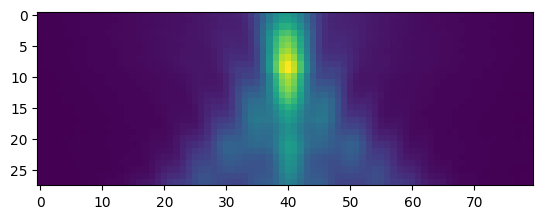

In [194]:
target_psf = a
target_psf = prep_data_for_PR(target_psf, multiplier = 1.2)
params = dict(wl=530, na=1.57, ni=1.46, res=65, zres=65, vec_corr = "total", condition = "sine")
plt.imshow(target_psf.sum(axis=2))
PR_result = retrieve_phase(target_psf, params, max_iters=3000, phase_only = False)

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'Magnitude Coefficients'}>,
        <Axes: title={'center': 'Phase Coefficients'}, xlabel="Noll's Number">],
       dtype=object))

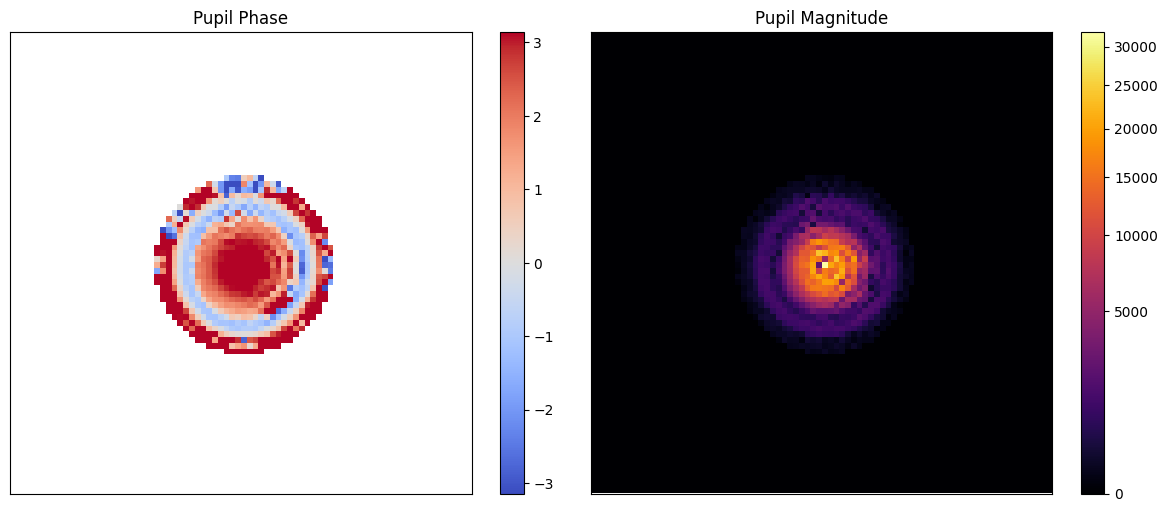

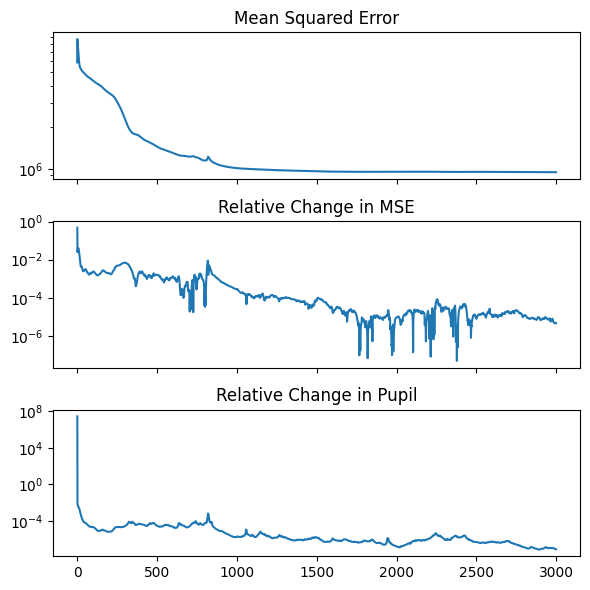

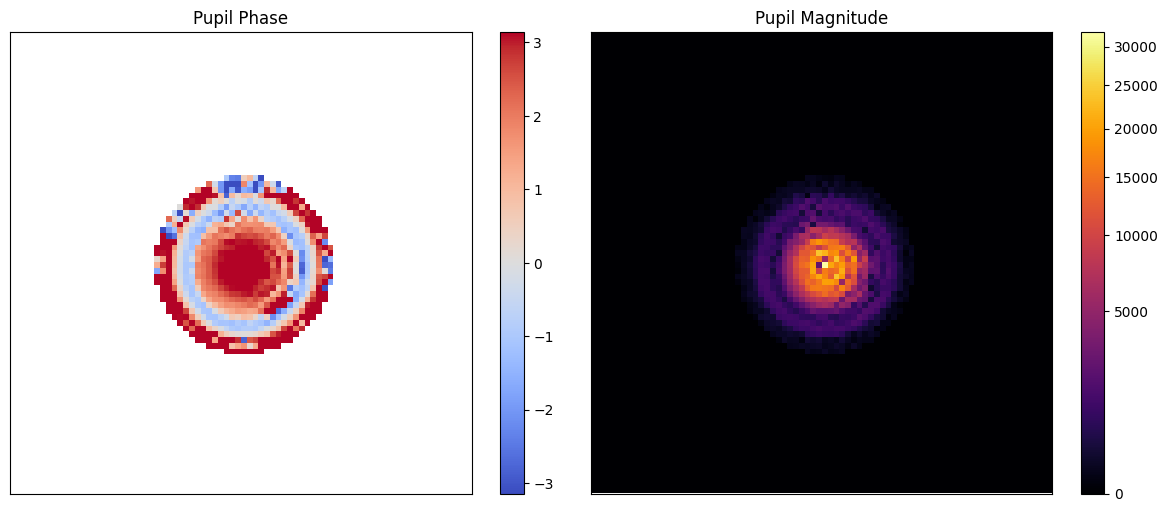

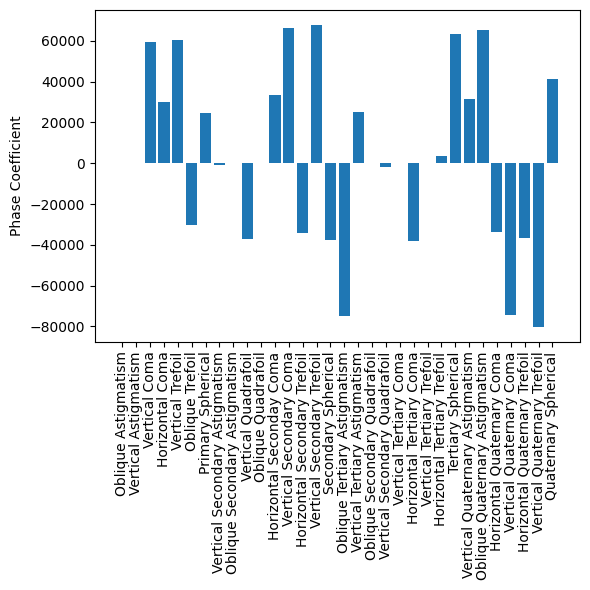

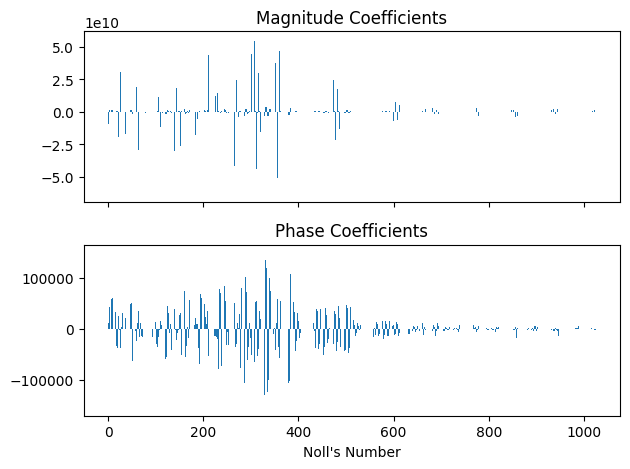

In [195]:
PR_result.fit_to_zernikes(1024)
PR_result.plot()
PR_result.plot_convergence()
PR_result.zd_result.plot()
PR_result.zd_result.plot_named_coefs()
PR_result.zd_result.plot_coefs()

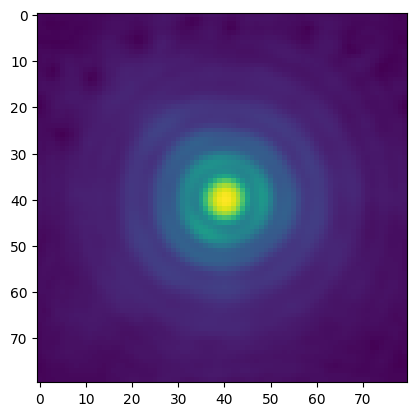

In [202]:
result_psf = PR_result.model
result_psf = apply_aberration(result_psf, PR_result.zd_result.mcoefs, PR_result.zd_result.pcoefs)
result_psf = result_psf.PSFi
plt.imshow(result_psf[14]**(1/2))

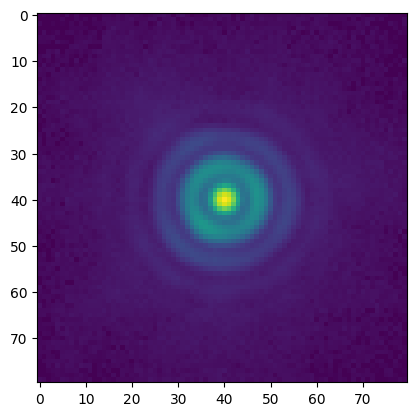

In [203]:
plt.imshow(target_psf[14]**(1/2))

In [198]:
target_psf.shape

(28, 80, 80)

In [199]:
from skimage.transform import rotate
def get_midline_rotate_method(arr):
    mid_x = arr.shape[1]//2
    midline = np.array([rotate(arr, angle, resize = False, clip = True, preserve_range = True)[mid_x] for angle in range(366)]).mean(axis=0)
    return midline/midline.max()

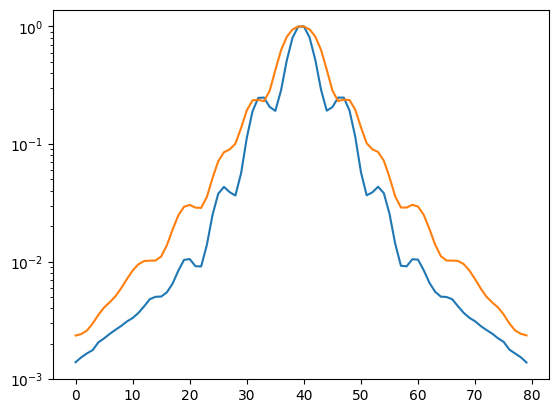

In [200]:
plt.plot(get_midline_rotate_method(target_psf[14]))
plt.plot(get_midline_rotate_method(result_psf[14]))
plt.yscale("log")

In [201]:
target_psf.shape

(28, 80, 80)